In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# your function must import layout and constants
# this is structured to work both in Jupyter notebook and from the command line
try:
    from . import layout
    from . import constants
except ImportError:
    import layout
    import constants
    
from random import randrange
from datetime import datetime
from pathlib import Path


In [3]:
def demo_function(*args, **kwargs):
    '''demo function that prints a docstring
    
    This function prints the __doc__ string for this function as a 
    demonstration of a Plugin "user-facing" function.
    
    Args:
        None
        
    Returns:
        None
    %U'''
    
    print(demo_function.__doc__)

In [4]:
def useless_function():
    '''useless function that does nothing
    
    This function does nothing, and will be ignored by the documentation 
    generators because it does not end with "%U" on the last line.
    '''
    2 + 2
    pass

In [5]:
# make sure this function can accept *args and **kwargs even if you don't intend to use them
def update_function(self, *args, **kwargs):
    '''update function for demo plugin providing some silly information and a picture
    
    This plugin provides a message generated for the user and 
    a static image that floats around
    
    Requirments:
        self.config(dict): {
            'your_name': 'user name',
            'your_color': 'user color',
        }
        
    Args: 
        self(namespace): namespace from plugin object
    
    Returns:
        tuple: (is_updated(bool), data(dict), priority(int))

    # Don't forget to end your docstring with a "%U" so it is displayed
    %U'''   
    
    # pull information from the plugin section of the configuration file (slimpi.ini)
    name = self.config['your_name']
    color = self.config['favorite_color']
    
    # do something with the configuration data
    strings = [
        f'Hi {name}! I hear your color is {color}',
        f'{name}, did you know your color has {len(color)} characters in it?',
        f'Your name spelled backwards is "{name[::-1]}"',
        f'If you sort your favorite color alphabetically, you get: {("").join(sorted(color))}',
        f'If you sort your name alphabetically, you get: {("").join(sorted(name))}',
        f'My temporary cache path is: {self.cache.path}'
    ]
    
    # define the components of the data that will be returned
    my_string = strings[randrange(0, len(strings)-1)]
    time = datetime.now().strftime("%H:%M")
    minute = datetime.now().strftime("%M")
    image = Path(constants.img_file).resolve()

    # optionally raise the priority under certain circumstances
    
    # if the minute is even, raise the priority, else, leave it at the normal priority
    if int(minute) % 2 == 0:
        priority = self.max_priority - 1
        extra_string = 'The minute is EVEN! I will raise the priority!'
    else:
        priority = self.max_priority
        extra_string = f'The minute is odd; this is my file cache: {self.cache.path}'
    
    # build the output
    is_updated = True
    data = {
        'string': my_string,
        'time': time,
        'extra': extra_string,
        'image': image
    }
    priority = priority
    
    
    return (is_updated, data, priority)

In [7]:
# # # this snip is useful for testing from within jupyter
# import logging
# # fugly hack for making the library module available to the plugins
# import sys
# sys.path.append(layout.dir_path+'/../..')
# from library import PluginTools
# logging.root.setLevel('DEBUG')
# from library.CacheFiles import CacheFiles
# def test_plugin():
#     '''This code snip is useful for testing a plugin from within Jupyter Notebook'''
#     from library import Plugin
#     from IPython.display import display
#     # this is set by PaperPi based on the configured schreen
#     test_plugin = Plugin(resolution=(1200, 800))
#     # this is pulled from the configuration file; the appropriate section is passed
#     # to this plugin by PaperPi during initial configuration
#     test_plugin.config = {
#         'your_name': 'Slartybartfast',
#         'favorite_color': 'Charturce',}
#     test_plugin.layout = layout.layout
#     # this is done automatically by PaperPi when loading the plugin
#     test_plugin.cache = CacheFiles()
#     test_plugin.update_function = update_function
#     test_plugin.update()
#     display(test_plugin.image)
#     return test_plugin
# my_plugin = test_plugin

DEBUG:root:[[----checking default values for layout----]
DEBUG:root:section: [------------string------------]
DEBUG:root:adding "font_size: None"
DEBUG:root:adding "maxchar: None"
DEBUG:root:adding "hcenter: False"
DEBUG:root:adding "vcenter: False"
DEBUG:root:adding "inverse: False"
DEBUG:root:adding "dimensions: None"
DEBUG:root:adding "padding: 0"
DEBUG:root:adding "fill: 0"
DEBUG:root:adding "bkground: 255"
DEBUG:root:section: [-------------time-------------]
DEBUG:root:adding "font_size: None"
DEBUG:root:adding "maxchar: None"
DEBUG:root:adding "hcenter: False"
DEBUG:root:adding "vcenter: False"
DEBUG:root:adding "inverse: False"
DEBUG:root:adding "dimensions: None"
DEBUG:root:adding "padding: 0"
DEBUG:root:adding "fill: 0"
DEBUG:root:adding "bkground: 255"
DEBUG:root:section: [------------extra-------------]
DEBUG:root:adding "font_size: None"
DEBUG:root:adding "maxchar: None"
DEBUG:root:adding "hcenter: False"
DEBUG:root:adding "vcenter: False"
DEBUG:root:adding "inverse: False"

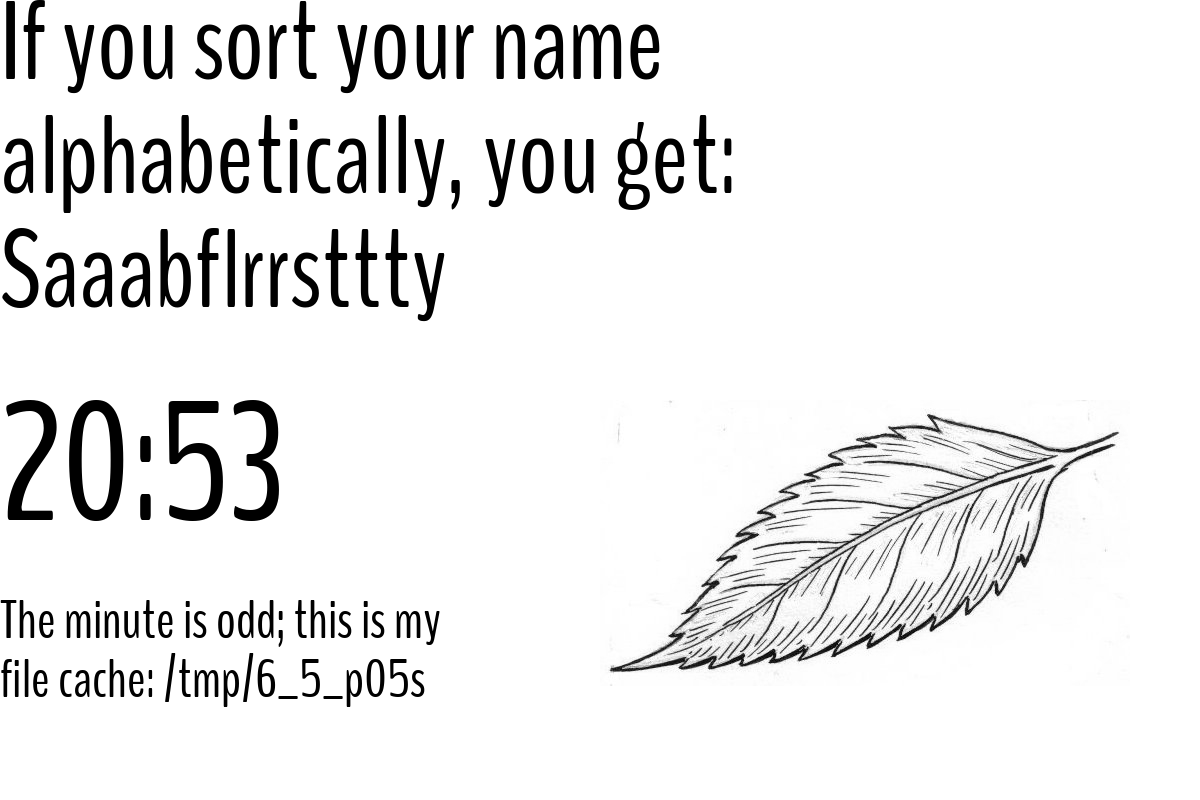

Plugin(None)

In [8]:
# # this simulates running your plugin from within paperpi
# my_plugin()

In [ ]:
# run this snip to create a symbolic to enable loading libraries for testing
!ln -s ../../library

In [ ]:
!jupyter-nbconvert --to python --template python_clean demo_plugin.ipynb